## Project 3 Submission

Please fill out:
* Student name: Anni Liu
* Instructor name: Hardik Idnani

In [1]:
# Import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
# Import data

data=pd.read_csv(r'C:\Users\AnnieLiu\Desktop\Bike-Sharing-Predictions\data\day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### Definitions: 

* instant : Record index
* dteday : date
* season : season (1:winter, 2:spring, 3:summer, 4:fall)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy (Good)
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Average)
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Poor)
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Very Bad)
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual : Count of casual users
* registered : Count of registered users
* cnt : Count of total rental bikes (incl. Casual and registered)

## Data Cleaning & EDA

In [3]:
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [4]:
# check for duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Converting the dteday to Date Time
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'].dtypes

dtype('<M8[ns]')

In [7]:
# Month number to month abbr 
import calendar
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])
data['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [8]:
# Check for Nulls
round(data.isnull().sum()/len(data.index)*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
data.describe()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500


In [11]:
data.sort_values("cnt")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,Oct,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
26,27,2011-01-27,1,0,Jan,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
725,726,2012-12-26,1,1,Dec,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
25,26,2011-01-26,1,0,Jan,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
64,65,2011-06-03,1,0,Mar,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,2012-05-19,2,1,May,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
447,448,2012-03-23,2,1,Mar,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
630,631,2012-09-22,3,1,Sep,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
637,638,2012-09-29,4,1,Sep,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555


### Cross Correlation 

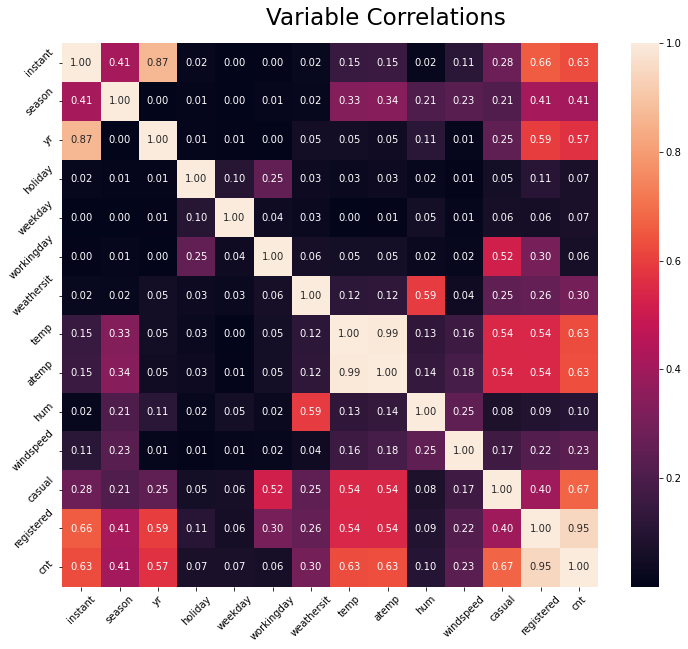

In [12]:
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(12,10))
fig.suptitle('Variable Correlations', fontsize=23, y=.93)
h = sns.heatmap(corr, annot=True, fmt='.2f')
h.set_xticklabels(h.get_xmajorticklabels(), fontsize = 10, rotation=45)
h.set_yticklabels(h.get_ymajorticklabels(), fontsize = 10, rotation=45);

Strong correlations to cnt: Registered, casual, atemp, temp, instant and yr.

C:\Users\AnnieLiu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


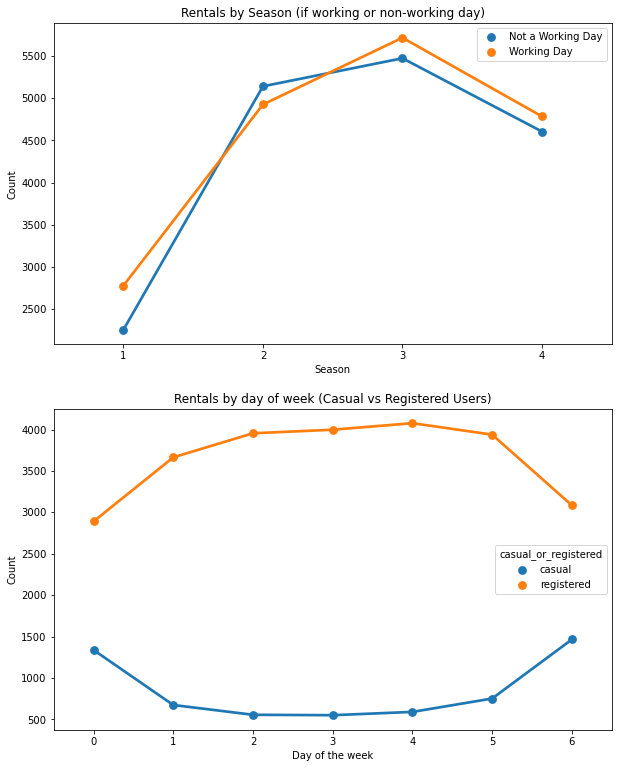

In [13]:
# Plots of average count across day of week for various categories
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 13))
group_work_day = pd.DataFrame(data.groupby(['workingday', 'season'])['cnt'].mean()).reset_index()
sns.pointplot(data=group_work_day, x='season', y='cnt', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Season', ylabel='Count', title='Rentals by Season (if working or non-working day)')

df_melt = pd.melt(frame=data, id_vars='weekday', value_vars=['casual', 'registered'], value_name='cnt', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['weekday', 'casual_or_registered'])['cnt'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='weekday', y='cnt', hue='casual_or_registered', ax=axes[1])
axes[1].set(xlabel='Day of the week', ylabel='Count', title='Rentals by day of week (Casual vs Registered Users)')

plt.show()

Across the year we can see that the activity between a working day vs non working day trends similarly. 
We can also see that most of our rentals come from registered riders. Where registered rentals slow down on Sat and Sun (weekend) whilst casual tends to peak on weekends - which makes sense.

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Bike share counts')

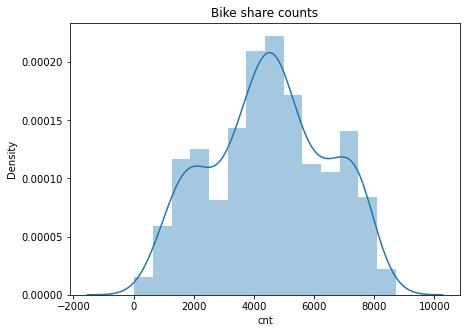

In [14]:
# Check for distribution of data
plt.figure(figsize= (7,5))
sns.distplot(data['cnt'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Bike share counts')

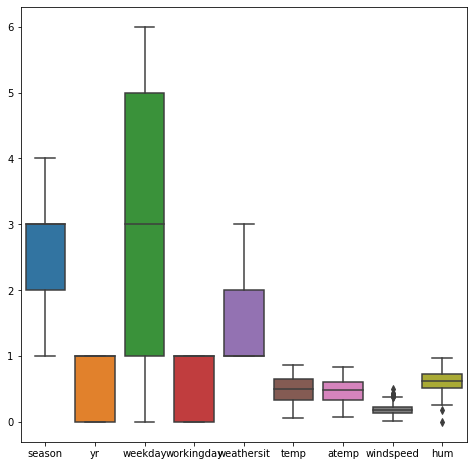

In [15]:
#Check for outliers in data using boxplot
sns.boxplot(data=data[['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp','atemp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)


C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

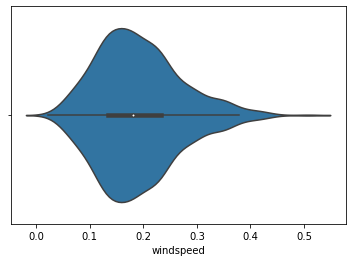

In [16]:
# Let's have a closer too at windspeed
plt.figure(figsize=(6,4))
sns.violinplot(data.windspeed)

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

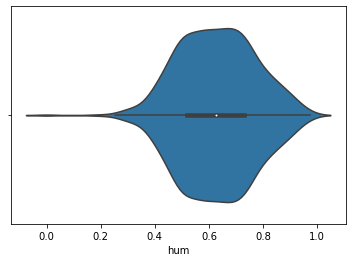

In [17]:
# Let's have a closer too at humidity
plt.figure(figsize=(6,4))
sns.violinplot(data.hum)

Based on the results we won't remove the outliers as they seem to be quite closely distributed anyways.

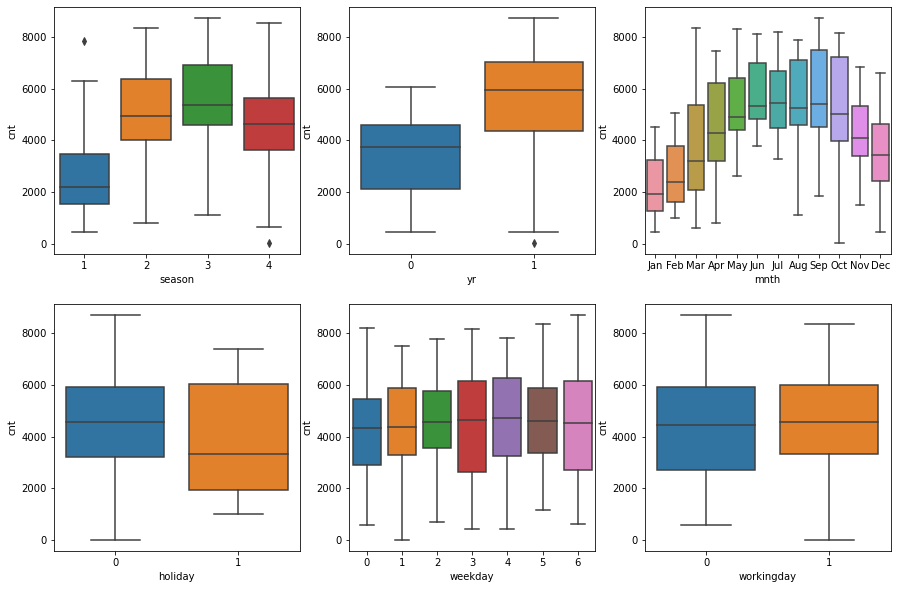

In [18]:
# Checking the distribution of cnts across different dependant variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=data)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=data)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=data)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=data)
plt.subplot(2,3,6)

plt.show()

We find that cnts are highest during Spring and Summer and lowest during Winter. Note: We know that from the season guide - season (1:winter, 2:spring, 3:summer, 4:fall). 

2012 rentals were much higher than 2011.

Otherwise, nothing too signficant from what we can see here.

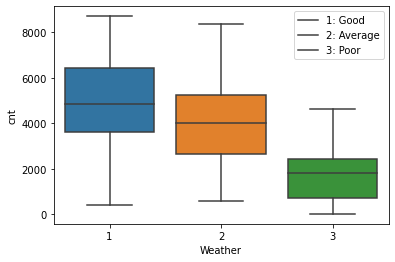

In [19]:
# Distribution on Weather (weathersit - 1, 2, 3, - representing Good, Average, Poor)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.legend(labels=["1: Good", "2: Average", "3: Poor"])
plt.xlabel('Weather')
plt.show()

Not surprisingly, rentals are higher during good weather and lowest during poor weather.

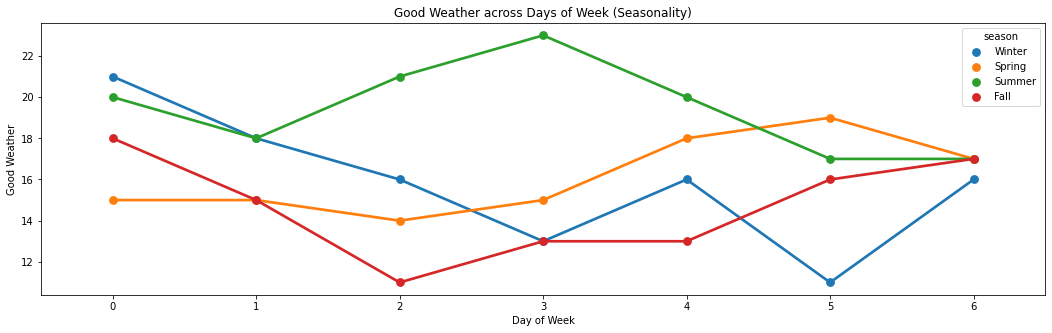

In [20]:
season_map = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
good_weather = data[data['weathersit'] == 1][['weekday', 'season']].copy()
data1 = pd.DataFrame({'cnt' : good_weather.groupby(["weekday","season"]).size()}).reset_index()
data1['season'] = data1['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data1["weekday"], y=data1["cnt"], hue=data1["season"], ax=ax)
ax.set(xlabel='Day of Week', ylabel='Good Weather', title="Good Weather across Days of Week (Seasonality)");

Summer seems to offer the best weather conditions, particularly during weekdays. That makes sense as most of our rentals come from registered riders, so it could be because these registered riders use the rentals for work/transportation. So in theory, the data of 'good weather' here could be skewed to registered riders.

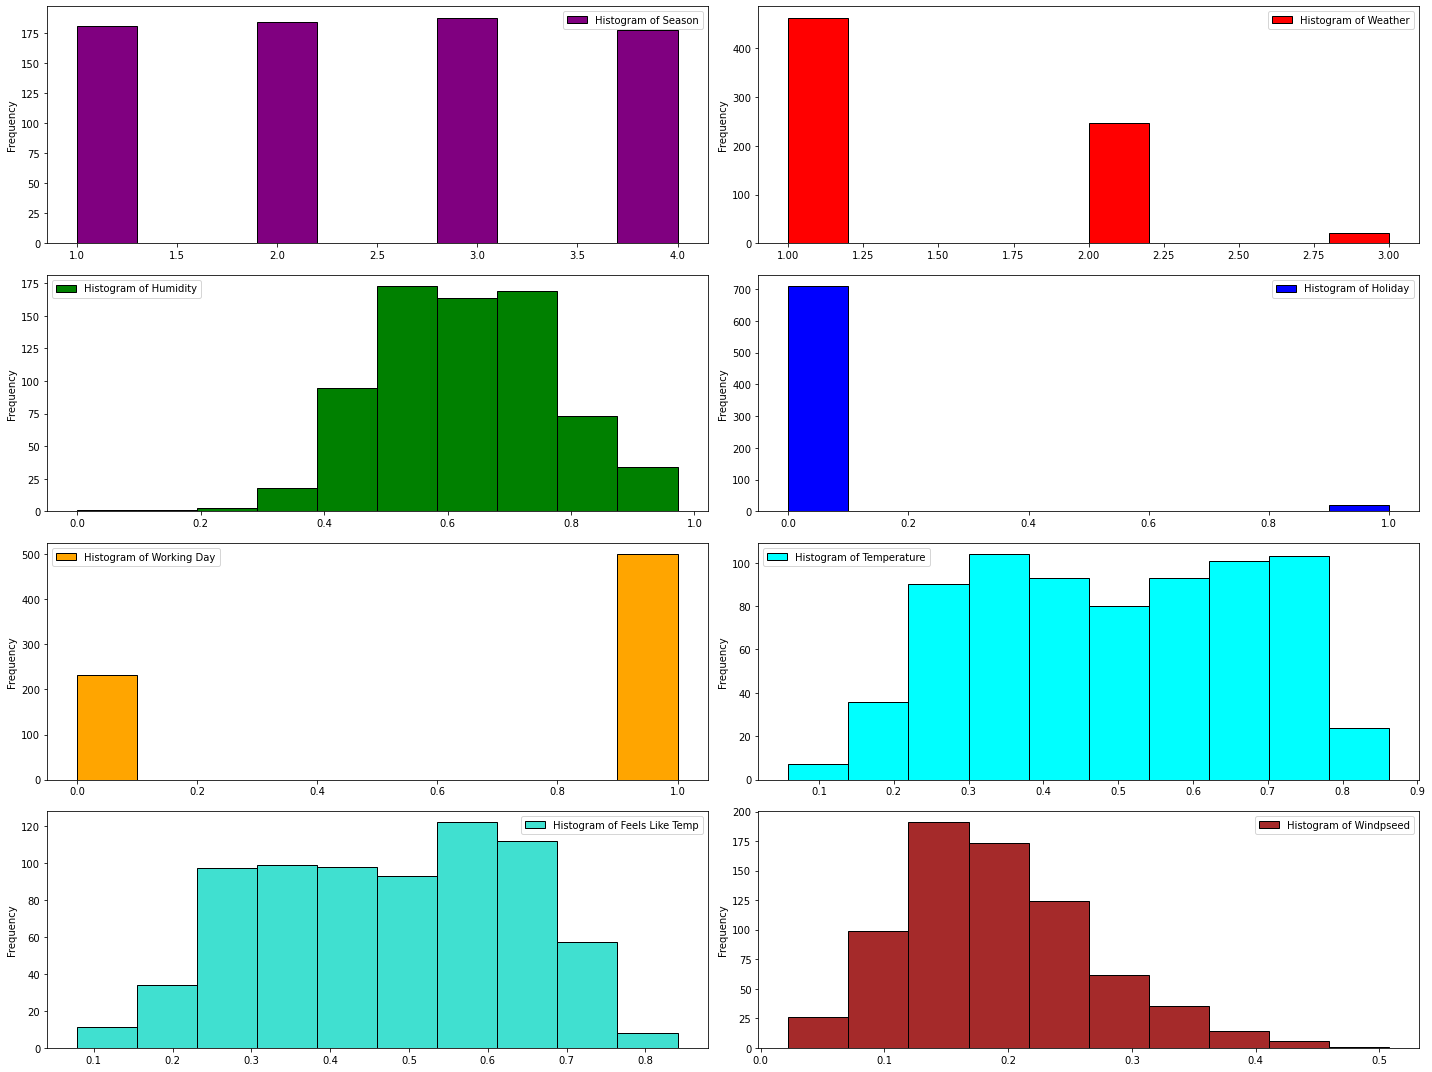

In [21]:
#Histograms for attributes
plt.figure(figsize=(20,15))
plt.subplot(421)
data['season'].plot.hist(bins=10, color='purple', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
data['weathersit'].plot.hist(bins=10, color='red', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
data['hum'].plot.hist(bins=10, color='green', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
data['holiday'].plot.hist(bins=10, color='blue', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
data['workingday'].plot.hist(bins=10, color='orange', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
data['temp'].plot.hist(bins=10, color='aqua', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
data['atemp'].plot.hist(bins=10, color='turquoise', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
data['windspeed'].plot.hist(bins=10, color='brown', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


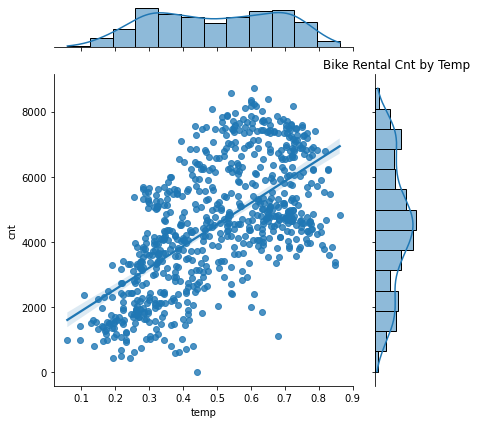

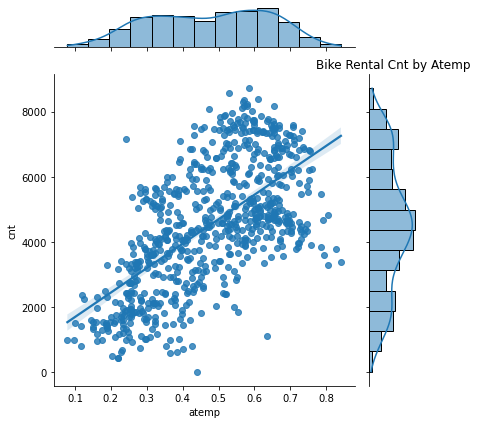

In [22]:
# examining the relationship between temp/atemp and cnt
sns.jointplot('temp','cnt', data=data, kind='reg')
plt.title("Bike Rental Cnt by Temp")
plt.tight_layout()
plt.ticklabel_format(style='plain')

sns.jointplot('atemp','cnt', data=data, kind='reg')
plt.title("Bike Rental Cnt by Atemp")
plt.tight_layout()
plt.ticklabel_format(style='plain')

In [23]:
# We know that registered and casual are included in cnt, so we drop those
# Drop unnecessary columns
data = data.drop(['registered', 'casual', 'dteday', 'instant'], axis=1)

However, an ideal temp/windspeed certainly does impact bike rentals.

In [24]:
data.corr()['cnt'].sort_values()

weathersit   -0.297391
windspeed    -0.234545
hum          -0.100659
holiday      -0.068348
workingday    0.061156
weekday       0.067443
season        0.406100
yr            0.566710
temp          0.627494
atemp         0.631066
cnt           1.000000
Name: cnt, dtype: float64

### Business Questions:

1. Which season produces most bike rentals? 
- Summer and Fall

2. Do we have more casual or registered riders?
- Registered

3. Does weathersit affect bike rentals and if so what can we find?
- During good weather there is higher demand for bike rental

4. What other attributes affects bike rental demand?
- temp and atemp

In [25]:
# Dummy variables for categorical data
dummy=pd.get_dummies(data[['season','mnth','weekday','weathersit']], drop_first=True)
dummy

,season,weekday,weathersit,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,6,2,0,0,0,1,0,0,0,0,0,0,0
1,1,0,2,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,0,0,0,0
3,1,2,1,0,0,0,1,0,0,0,0,0,0,0
4,1,3,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,4,2,0,1,0,0,0,0,0,0,0,0,0
727,1,5,2,0,1,0,0,0,0,0,0,0,0,0
728,1,6,2,0,1,0,0,0,0,0,0,0,0,0
729,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [26]:
data=pd.concat([data,dummy], axis=1)
data=data.drop(['season','mnth','weekday','weathersit'], axis=1)
data

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,2114,0,1,0,0,0,0,0,0,0,0,0
727,1,0,1,0.253333,0.255046,0.590000,0.155471,3095,0,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.253333,0.242400,0.752917,0.124383,1341,0,1,0,0,0,0,0,0,0,0,0
729,1,0,0,0.255833,0.231700,0.483333,0.350754,1796,0,1,0,0,0,0,0,0,0,0,0


### Split Train and Test data

In [27]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
print(len(df_train), "train +", len(df_test), "test")

511 train + 220 test


In [28]:
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
576,1,0,1,0.730833,0.684987,0.668750,0.153617,7105,0,0,0,0,1,0,0,0,0,0,0
426,1,0,1,0.353333,0.359842,0.657083,0.144904,3194,0,0,0,0,0,0,1,0,0,0,0
729,1,0,0,0.255833,0.231700,0.483333,0.350754,1796,0,1,0,0,0,0,0,0,0,0,0
482,1,0,1,0.457500,0.452637,0.400833,0.347633,6233,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.336667,0.321954,0.729583,0.219521,1683,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#Feature scaling
scaler = MinMaxScaler() 
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

C:\Users\AnnieLiu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


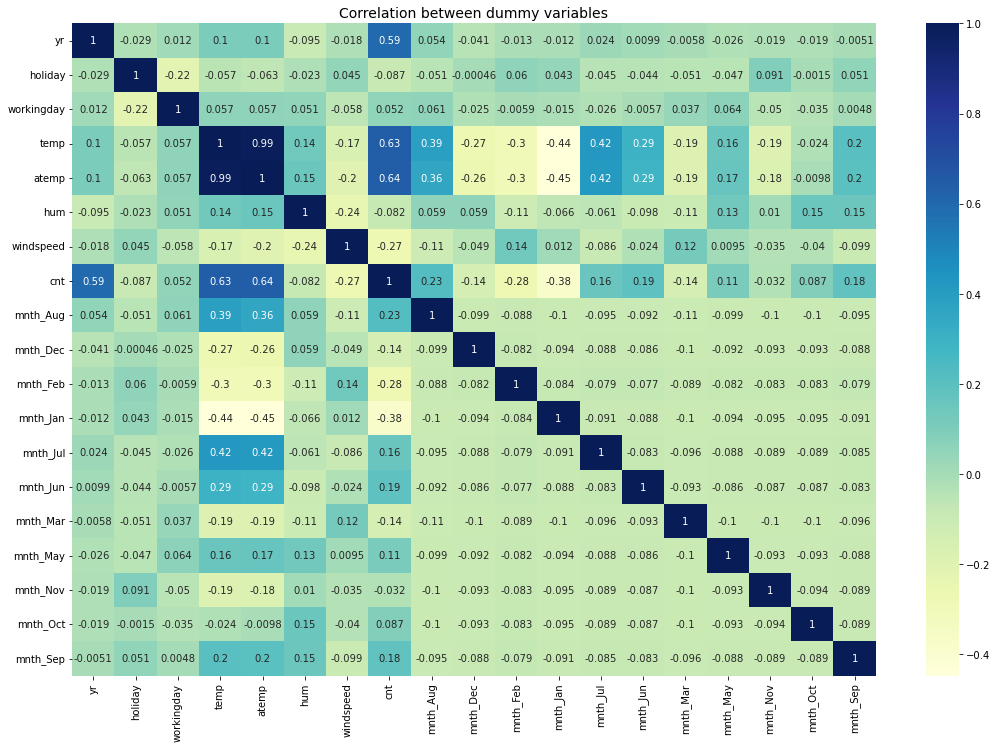

In [30]:
#Heatmap to see correlation between variables
plt.figure(figsize=(18, 12))
sns.heatmap(df_train.corr(), cmap='YlGnBu', annot=True)
plt.title("Correlation between dummy variables", size=14)

plt.show()

Strong correlations to cnt: atemp, temp and yr.

### Baseline model

In [31]:
baseline_model=sm.formula.ols(formula='cnt ~ atemp', data=data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     482.5
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.85e-82
Time:                        10:05:11   Log-Likelihood:                -6384.0
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     729   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    945.8240    171.291      5.522      0.000     609.541    1282.107
atemp       7501.8339    341.538     21.965      0.000    6831.318    8172.350
==============================================================================
Omnibus:                       13.710   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.448
Skew:                           0.150   Prob(JB):                      0.00888
Kurtosis:                       2.531   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
The baseline model has an  of 0.398.

Below we check residuals and mean square error.

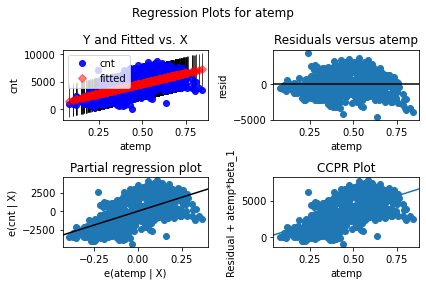

In [32]:
fig = sm.graphics.plot_regress_exog(baseline_model, "atemp")
fig.tight_layout(pad=1.0)

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


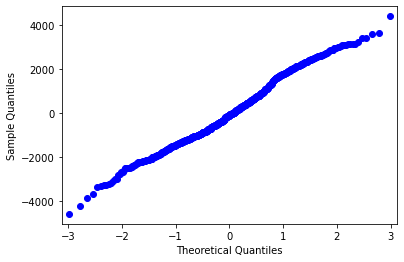

In [33]:
res = baseline_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

Q-Q plot suggests model qualifies for assumptions of linearity.

### Model 1

In [34]:
# generating model with statsmodels
model1= ols(formula='cnt~atemp+temp+yr', 
                data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     377.3
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.03e-128
Time:                        10:05:11   Log-Likelihood:                 336.64
No. Observations:                 511   AIC:                            -665.3
Df Residuals:                     507   BIC:                            -648.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0770      0.015      5.088      0.000       0.047       0.107
atemp          0.5236      0.183      2.857      0.004       0.164       0.884
temp           0.0878      0.172      0.510      0.610      -0.250       0.426
yr             0.2411      0.011     21.559      0.000       0.219       0.263
==============================================================================
Omnibus:                       39.505   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.366
Skew:                          -0.589   Prob(JB):                     9.49e-13
Kurtosis:                       4.102   Cond. No.                         61.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Huge improvement from baseline. R-Squared is 0.691, which indicates our model accounts for 69% of the variance in bike rentals. 

### Model 2

In [35]:
outcome = 'cnt'
x_cols = ['atemp', 'temp', 'yr']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     534.2
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.64e-183
Time:                        10:05:11   Log-Likelihood:                -6144.1
No. Observations:                 731   AIC:                         1.230e+04
Df Residuals:                     727   BIC:                         1.231e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.4128    140.364      0.395      0.693    -220.153     330.979
atemp       6741.2292   1915.880      3.519      0.000    2979.911    1.05e+04
temp         417.7510   1705.733      0.245      0.807   -2930.999    3766.501
yr          2085.6659     80.314     25.969      0.000    1927.992    2243.340
==============================================================================
Omnibus:                       43.812   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.312
Skew:                          -0.525   Prob(JB):                     3.59e-13
Kurtosis:                       3.882   Cond. No.                         85.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 1 is slightly better.

In [36]:
# Model 3
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     117.9
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.48e-165
Time:                        10:05:11   Log-Likelihood:                 463.70
No. Observations:                 511   AIC:                            -889.4
Df Residuals:                     492   BIC:                            -808.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4507      0.037     12.268      0.000       0.378       0.523
yr             0.2350      0.009     26.092      0.000       0.217       0.253
holiday       -0.0556      0.030     -1.832      0.068      -0.115       0.004
workingday     0.0044      0.010      0.452      0.651      -0.015       0.023
temp           0.4222      0.158      2.665      0.008       0.111       0.733
atemp          0.0724      0.155      0.466      0.641      -0.233       0.378
hum           -0.3359      0.033    -10.246      0.000      -0.400      -0.272
windspeed     -0.2686      0.029     -9.150      0.000      -0.326      -0.211
mnth_Aug      -0.0196      0.027     -0.730      0.466      -0.073       0.033
mnth_Dec      -0.0071      0.024     -0.297      0.766      -0.054       0.040
mnth_Feb      -0.1171      0.025     -4.613      0.000      -0.167      -0.067
mnth_Jan      -0.1356      0.026     -5.173      0.000      -0.187      -0.084
mnth_Jul      -0.0889      0.029     -3.039      0.003      -0.146      -0.031
mnth_Jun      -0.0090      0.027     -0.337      0.736      -0.062       0.044
mnth_Mar      -0.0506      0.022     -2.328      0.020      -0.093      -0.008
mnth_May       0.0377      0.024      1.603      0.109      -0.008       0.084
mnth_Nov       0.0357      0.023      1.563      0.119      -0.009       0.081
mnth_Oct       0.0816      0.022      3.648      0.000       0.038       0.126
mnth_Sep       0.0589      0.025      2.371      0.018       0.010       0.108
==============================================================================
Omnibus:                      113.172   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.318
Skew:                          -1.084   Prob(JB):                     1.37e-66
Kurtosis:                       6.090   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Checking Variance inflation factor - MultiColinearity)

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,434.80
4,atemp,381.33
5,hum,19.05
6,windspeed,4.57
7,mnth_Aug,3.58
11,mnth_Jul,3.44
2,workingday,3.15
12,mnth_Jun,2.75
17,mnth_Sep,2.48
14,mnth_May,2.38


### More models

In [38]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('temp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4= lr.fit()
lr_model4.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     122.9
Date:                Fri, 20 May 2022   Prob (F-statistic):          7.30e-165
Time:                        10:05:12   Log-Likelihood:                 460.04
No. Observations:                 511   AIC:                            -884.1
Df Residuals:                     493   BIC:                            -807.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4607      0.037     12.531      0.000       0.388       0.533
yr             0.2367      0.009     26.183      0.000       0.219       0.254
holiday       -0.0487      0.030     -1.602      0.110      -0.109       0.011
workingday     0.0054      0.010      0.551      0.582      -0.014       0.024
atemp          0.4656      0.049      9.492      0.000       0.369       0.562
hum           -0.3332      0.033    -10.105      0.000      -0.398      -0.268
windspeed     -0.2516      0.029     -8.728      0.000      -0.308      -0.195
mnth_Aug       0.0085      0.025      0.343      0.732      -0.040       0.057
mnth_Dec      -0.0139      0.024     -0.581      0.562      -0.061       0.033
mnth_Feb      -0.1244      0.025     -4.899      0.000      -0.174      -0.075
mnth_Jan      -0.1454      0.026     -5.567      0.000      -0.197      -0.094
mnth_Jul      -0.0625      0.028     -2.257      0.024      -0.117      -0.008
mnth_Jun       0.0124      0.026      0.483      0.629      -0.038       0.063
mnth_Mar      -0.0521      0.022     -2.382      0.018      -0.095      -0.009
mnth_May       0.0482      0.023      2.068      0.039       0.002       0.094
mnth_Nov       0.0310      0.023      1.354      0.176      -0.014       0.076
mnth_Oct       0.0833      0.022      3.702      0.000       0.039       0.127
mnth_Sep       0.0748      0.024      3.084      0.002       0.027       0.122
==============================================================================
Omnibus:                      112.321   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.651
Skew:                          -1.042   Prob(JB):                     2.61e-72
Kurtosis:                       6.337   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     125.1
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.43e-166
Time:                        10:05:12   Log-Likelihood:                 463.59
No. Observations:                 511   AIC:                            -891.2
Df Residuals:                     493   BIC:                            -814.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4520      0.037     12.350      0.000       0.380       0.524
yr             0.2349      0.009     26.108      0.000       0.217       0.253
holiday       -0.0564      0.030     -1.864      0.063      -0.116       0.003
workingday     0.0043      0.010      0.443      0.658      -0.015       0.023
temp           0.4923      0.050      9.912      0.000       0.395       0.590
hum           -0.3356      0.033    -10.245      0.000      -0.400      -0.271
windspeed     -0.2718      0.029     -9.532      0.000      -0.328      -0.216
mnth_Aug      -0.0226      0.026     -0.865      0.388      -0.074       0.029
mnth_Dec      -0.0072      0.024     -0.301      0.764      -0.054       0.040
mnth_Feb      -0.1174      0.025     -4.630      0.000      -0.167      -0.068
mnth_Jan      -0.1360      0.026     -5.197      0.000      -0.187      -0.085
mnth_Jul      -0.0910      0.029     -3.150      0.002      -0.148      -0.034
mnth_Jun      -0.0109      0.026     -0.412      0.680      -0.063       0.041
mnth_Mar      -0.0511      0.022     -2.354      0.019      -0.094      -0.008
mnth_May       0.0368      0.023      1.573      0.116      -0.009       0.083
mnth_Nov       0.0357      0.023      1.563      0.119      -0.009       0.081
mnth_Oct       0.0813      0.022      3.640      0.000       0.037       0.125
mnth_Sep       0.0573      0.025      2.331      0.020       0.009       0.106
==============================================================================
Omnibus:                      112.298   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.932
Skew:                          -1.078   Prob(JB):                     1.22e-65
Kurtosis:                       6.064   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     124.1
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.15e-165
Time:                        10:05:12   Log-Likelihood:                 461.97
No. Observations:                 511   AIC:                            -887.9
Df Residuals:                     493   BIC:                            -811.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4500      0.037     12.220      0.000       0.378       0.522
yr             0.2357      0.009     26.119      0.000       0.218       0.253
workingday     0.0082      0.009      0.865      0.387      -0.010       0.027
temp           0.3975      0.158      2.513      0.012       0.087       0.708
atemp          0.0891      0.155      0.573      0.567      -0.216       0.395
hum           -0.3343      0.033    -10.174      0.000      -0.399      -0.270
windspeed     -0.2693      0.029     -9.154      0.000      -0.327      -0.211
mnth_Aug      -0.0158      0.027     -0.587      0.558      -0.069       0.037
mnth_Dec      -0.0086      0.024     -0.358      0.721      -0.056       0.039
mnth_Feb      -0.1206      0.025     -4.754      0.000      -0.170      -0.071
mnth_Jan      -0.1391      0.026     -5.310      0.000      -0.191      -0.088
mnth_Jul      -0.0841      0.029     -2.879      0.004      -0.141      -0.027
mnth_Jun      -0.0051      0.027     -0.190      0.849      -0.058       0.047
mnth_Mar      -0.0502      0.022     -2.305      0.022      -0.093      -0.007
mnth_May       0.0398      0.024      1.693      0.091      -0.006       0.086
mnth_Nov       0.0324      0.023      1.420      0.156      -0.012       0.077
mnth_Oct       0.0817      0.022      3.645      0.000       0.038       0.126
mnth_Sep       0.0590      0.025      2.369      0.018       0.010       0.108
==============================================================================
Omnibus:                      111.633   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.685
Skew:                          -1.072   Prob(JB):                     3.76e-65
Kurtosis:                       6.055   Cond. No.                         85.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     125.1
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.42e-166
Time:                        10:05:12   Log-Likelihood:                 463.60
No. Observations:                 511   AIC:                            -891.2
Df Residuals:                     493   BIC:                            -814.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4530      0.036     12.464      0.000       0.382       0.524
yr             0.2350      0.009     26.111      0.000       0.217       0.253
holiday       -0.0585      0.030     -1.977      0.049      -0.117      -0.000
temp           0.4249      0.158      2.687      0.007       0.114       0.736
atemp          0.0710      0.155      0.457      0.648      -0.234       0.376
hum           -0.3356      0.033    -10.246      0.000      -0.400      -0.271
windspeed     -0.2693      0.029     -9.192      0.000      -0.327      -0.212
mnth_Aug      -0.0198      0.027     -0.738      0.461      -0.073       0.033
mnth_Dec      -0.0071      0.024     -0.297      0.767      -0.054       0.040
mnth_Feb      -0.1167      0.025     -4.604      0.000      -0.167      -0.067
mnth_Jan      -0.1353      0.026     -5.167      0.000      -0.187      -0.084
mnth_Jul      -0.0897      0.029     -3.075      0.002      -0.147      -0.032
mnth_Jun      -0.0095      0.027     -0.357      0.721      -0.062       0.043
mnth_Mar      -0.0503      0.022     -2.316      0.021      -0.093      -0.008
mnth_May       0.0378      0.023      1.610      0.108      -0.008       0.084
mnth_Nov       0.0356      0.023      1.560      0.119      -0.009       0.080
mnth_Oct       0.0813      0.022      3.639      0.000       0.037       0.125
mnth_Sep       0.0586      0.025      2.363      0.019       0.010       0.107
==============================================================================
Omnibus:                      113.253   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.210
Skew:                          -1.089   Prob(JB):                     6.46e-66
Kurtosis:                       6.059   Cond. No.                         78.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
lr_model8.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     118.7
Date:                Fri, 20 May 2022   Prob (F-statistic):          6.92e-162
Time:                        10:05:12   Log-Likelihood:                 452.88
No. Observations:                 511   AIC:                            -869.8
Df Residuals:                     493   BIC:                            -793.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3644      0.032     11.293      0.000       0.301       0.428
yr             0.2339      0.009     25.458      0.000       0.216       0.252
holiday       -0.0661      0.031     -2.142      0.033      -0.127      -0.005
workingday     0.0028      0.010      0.289      0.773      -0.017       0.022
temp           0.5009      0.161      3.118      0.002       0.185       0.817
atemp          0.0895      0.158      0.565      0.573      -0.222       0.401
hum           -0.3468      0.033    -10.392      0.000      -0.412      -0.281
windspeed     -0.2648      0.030     -8.846      0.000      -0.324      -0.206
mnth_Aug      -0.0016      0.027     -0.059      0.953      -0.055       0.052
mnth_Dec       0.0550      0.020      2.726      0.007       0.015       0.095
mnth_Jan      -0.0622      0.021     -2.927      0.004      -0.104      -0.020
mnth_Jul      -0.0776      0.030     -2.610      0.009      -0.136      -0.019
mnth_Jun       0.0108      0.027      0.400      0.689      -0.042       0.064
mnth_Mar       0.0038      0.019      0.206      0.837      -0.033       0.040
mnth_May       0.0697      0.023      3.043      0.002       0.025       0.115
mnth_Nov       0.0924      0.020      4.697      0.000       0.054       0.131
mnth_Oct       0.1267      0.021      6.175      0.000       0.086       0.167
mnth_Sep       0.0880      0.025      3.591      0.000       0.040       0.136
==============================================================================
Omnibus:                       94.039   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.733
Skew:                          -0.957   Prob(JB):                     5.25e-48
Kurtosis:                       5.561   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 20 May 2022   Prob (F-statistic):          3.19e-165
Time:                        10:05:12   Log-Likelihood:                 460.90
No. Observations:                 511   AIC:                            -885.8
Df Residuals:                     493   BIC:                            -809.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4125      0.033     12.492      0.000       0.348       0.477
yr             0.2352      0.009     25.991      0.000       0.217       0.253
holiday       -0.0549      0.030     -1.802      0.072      -0.115       0.005
workingday     0.0036      0.010      0.374      0.708      -0.015       0.023
temp           0.4316      0.159      2.714      0.007       0.119       0.744
atemp          0.0890      0.156      0.571      0.568      -0.217       0.395
hum           -0.3399      0.033    -10.334      0.000      -0.405      -0.275
windspeed     -0.2649      0.029     -8.999      0.000      -0.323      -0.207
mnth_Aug       0.0007      0.026      0.027      0.978      -0.050       0.051
mnth_Dec       0.0244      0.020      1.233      0.218      -0.014       0.063
mnth_Feb      -0.0850      0.021     -3.971      0.000      -0.127      -0.043
mnth_Jan      -0.1012      0.022     -4.654      0.000      -0.144      -0.058
mnth_Jul      -0.0706      0.028     -2.495      0.013      -0.126      -0.015
mnth_Jun       0.0114      0.025      0.451      0.652      -0.038       0.061
mnth_May       0.0614      0.021      2.885      0.004       0.020       0.103
mnth_Nov       0.0656      0.019      3.451      0.001       0.028       0.103
mnth_Oct       0.1086      0.019      5.659      0.000       0.071       0.146
mnth_Sep       0.0819      0.023      3.575      0.000       0.037       0.127
==============================================================================
Omnibus:                      111.252   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.250
Skew:                          -1.073   Prob(JB):                     3.46e-64
Kurtosis:                       6.020   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
lr_model10.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     98.03
Date:                Fri, 20 May 2022   Prob (F-statistic):          7.55e-146
Time:                        10:05:12   Log-Likelihood:                 414.29
No. Observations:                 511   AIC:                            -792.6
Df Residuals:                     493   BIC:                            -716.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2725      0.036      7.652      0.000       0.202       0.342
yr             0.2460      0.010     24.998      0.000       0.227       0.265
holiday       -0.0469      0.033     -1.406      0.160      -0.113       0.019
workingday     0.0020      0.011      0.189      0.850      -0.019       0.023
temp           0.3717      0.174      2.134      0.033       0.029       0.714
atemp          0.0337      0.171      0.197      0.844      -0.302       0.370
windspeed     -0.2170      0.032     -6.821      0.000      -0.280      -0.155
mnth_Aug      -0.0169      0.030     -0.571      0.568      -0.075       0.041
mnth_Dec      -0.0454      0.026     -1.744      0.082      -0.096       0.006
mnth_Feb      -0.1357      0.028     -4.872      0.000      -0.190      -0.081
mnth_Jan      -0.1669      0.029     -5.825      0.000      -0.223      -0.111
mnth_Jul      -0.0613      0.032     -1.913      0.056      -0.124       0.002
mnth_Jun       0.0157      0.029      0.536      0.592      -0.042       0.073
mnth_Mar      -0.0621      0.024     -2.602      0.010      -0.109      -0.015
mnth_May       0.0141      0.026      0.548      0.584      -0.036       0.065
mnth_Nov       0.0094      0.025      0.375      0.708      -0.040       0.058
mnth_Oct       0.0432      0.024      1.781      0.076      -0.004       0.091
mnth_Sep       0.0367      0.027      1.348      0.178      -0.017       0.090
==============================================================================
Omnibus:                      118.903   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.037
Skew:                          -1.136   Prob(JB):                     3.20e-70
Kurtosis:                       6.141   Cond. No.                         79.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Nov',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     124.4
Date:                Fri, 20 May 2022   Prob (F-statistic):          7.34e-166
Time:                        10:05:12   Log-Likelihood:                 462.44
No. Observations:                 511   AIC:                            -888.9
Df Residuals:                     493   BIC:                            -812.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4765      0.033     14.512      0.000       0.412       0.541
yr             0.2350      0.009     26.051      0.000       0.217       0.253
holiday       -0.0519      0.030     -1.712      0.088      -0.111       0.008
workingday     0.0043      0.010      0.439      0.661      -0.015       0.023
temp           0.4032      0.158      2.549      0.011       0.092       0.714
atemp          0.0718      0.156      0.462      0.645      -0.234       0.378
hum           -0.3302      0.033    -10.119      0.000      -0.394      -0.266
windspeed     -0.2746      0.029     -9.423      0.000      -0.332      -0.217
mnth_Aug      -0.0320      0.026     -1.242      0.215      -0.083       0.019
mnth_Dec      -0.0286      0.020     -1.458      0.145      -0.067       0.010
mnth_Feb      -0.1384      0.021     -6.457      0.000      -0.181      -0.096
mnth_Jan      -0.1590      0.022     -7.380      0.000      -0.201      -0.117
mnth_Jul      -0.0997      0.028     -3.503      0.001      -0.156      -0.044
mnth_Jun      -0.0213      0.026     -0.833      0.405      -0.072       0.029
mnth_Mar      -0.0696      0.018     -3.866      0.000      -0.105      -0.034
mnth_May       0.0225      0.021      1.052      0.294      -0.020       0.065
mnth_Oct       0.0635      0.019      3.314      0.001       0.026       0.101
mnth_Sep       0.0439      0.023      1.913      0.056      -0.001       0.089
==============================================================================
Omnibus:                      111.781   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.544
Skew:                          -1.078   Prob(JB):                     1.81e-64
Kurtosis:                       6.022   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
lr_model12.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     121.1
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.50e-163
Time:                        10:05:12   Log-Likelihood:                 456.88
No. Observations:                 511   AIC:                            -877.8
Df Residuals:                     493   BIC:                            -801.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4853      0.036     13.511      0.000       0.415       0.556
yr             0.2338      0.009     25.658      0.000       0.216       0.252
holiday       -0.0559      0.031     -1.821      0.069      -0.116       0.004
workingday     0.0033      0.010      0.335      0.738      -0.016       0.022
temp           0.4384      0.160      2.735      0.006       0.123       0.753
atemp          0.0570      0.157      0.363      0.717      -0.252       0.366
hum           -0.3159      0.033     -9.653      0.000      -0.380      -0.252
windspeed     -0.2812      0.030     -9.528      0.000      -0.339      -0.223
mnth_Aug      -0.0647      0.024     -2.669      0.008      -0.112      -0.017
mnth_Dec      -0.0509      0.021     -2.426      0.016      -0.092      -0.010
mnth_Feb      -0.1576      0.023     -6.820      0.000      -0.203      -0.112
mnth_Jan      -0.1776      0.024     -7.447      0.000      -0.224      -0.131
mnth_Jul      -0.1327      0.027     -4.917      0.000      -0.186      -0.080
mnth_Jun      -0.0519      0.024     -2.131      0.034      -0.100      -0.004
mnth_Mar      -0.0918      0.019     -4.882      0.000      -0.129      -0.055
mnth_May      -0.0068      0.020     -0.335      0.738      -0.047       0.033
mnth_Nov      -0.0075      0.020     -0.381      0.704      -0.046       0.031
mnth_Sep       0.0132      0.022      0.607      0.544      -0.029       0.056
==============================================================================
Omnibus:                       91.216   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.927
Skew:                          -0.949   Prob(JB):                     2.34e-44
Kurtosis:                       5.415   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Jul',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()
lr_model13.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     122.3
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.07e-164
Time:                        10:05:12   Log-Likelihood:                 458.95
No. Observations:                 511   AIC:                            -881.9
Df Residuals:                     493   BIC:                            -805.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4571      0.037     12.360      0.000       0.384       0.530
yr             0.2383      0.009     26.417      0.000       0.221       0.256
holiday       -0.0473      0.030     -1.553      0.121      -0.107       0.013
workingday     0.0062      0.010      0.634      0.526      -0.013       0.025
temp           0.2593      0.150      1.726      0.085      -0.036       0.555
atemp          0.1448      0.155      0.935      0.350      -0.159       0.449
hum           -0.3268      0.033     -9.926      0.000      -0.391      -0.262
windspeed     -0.2547      0.029     -8.711      0.000      -0.312      -0.197
mnth_Aug       0.0380      0.019      1.975      0.049       0.000       0.076
mnth_Dec       0.0041      0.024      0.173      0.862      -0.043       0.051
mnth_Feb      -0.1107      0.026     -4.339      0.000      -0.161      -0.061
mnth_Jan      -0.1354      0.026     -5.124      0.000      -0.187      -0.083
mnth_Jun       0.0451      0.020      2.239      0.026       0.006       0.085
mnth_Mar      -0.0329      0.021     -1.557      0.120      -0.074       0.009
mnth_May       0.0786      0.019      4.049      0.000       0.040       0.117
mnth_Nov       0.0521      0.022      2.329      0.020       0.008       0.096
mnth_Oct       0.1095      0.021      5.327      0.000       0.069       0.150
mnth_Sep       0.1045      0.020      5.233      0.000       0.065       0.144
==============================================================================
Omnibus:                      117.719   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.654
Skew:                          -1.100   Prob(JB):                     2.90e-74
Kurtosis:                       6.327   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Jan',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     117.2
Date:                Fri, 20 May 2022   Prob (F-statistic):          9.30e-161
Time:                        10:05:12   Log-Likelihood:                 450.17
No. Observations:                 511   AIC:                            -864.3
Df Residuals:                     493   BIC:                            -788.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3377      0.030     11.144      0.000       0.278       0.397
yr             0.2326      0.009     25.211      0.000       0.215       0.251
holiday       -0.0671      0.031     -2.162      0.031      -0.128      -0.006
workingday     0.0029      0.010      0.296      0.767      -0.017       0.022
temp           0.5368      0.161      3.337      0.001       0.221       0.853
atemp          0.1009      0.159      0.634      0.527      -0.212       0.414
hum           -0.3557      0.033    -10.647      0.000      -0.421      -0.290
windspeed     -0.2523      0.030     -8.427      0.000      -0.311      -0.193
mnth_Aug      -0.0089      0.028     -0.324      0.746      -0.063       0.045
mnth_Dec       0.0689      0.019      3.555      0.000       0.031       0.107
mnth_Feb      -0.0374      0.021     -1.808      0.071      -0.078       0.003
mnth_Jul      -0.0886      0.030     -2.951      0.003      -0.148      -0.030
mnth_Jun       0.0036      0.027      0.132      0.895      -0.050       0.057
mnth_Mar       0.0128      0.018      0.694      0.488      -0.023       0.049
mnth_May       0.0686      0.023      2.941      0.003       0.023       0.114
mnth_Nov       0.1032      0.019      5.366      0.000       0.065       0.141
mnth_Oct       0.1324      0.021      6.421      0.000       0.092       0.173
mnth_Sep       0.0861      0.025      3.456      0.001       0.037       0.135
==============================================================================
Omnibus:                       92.847   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.248
Skew:                          -0.954   Prob(JB):                     2.21e-46
Kurtosis:                       5.496   Cond. No.                         85.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model15 = lr.fit()
lr_model15.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     125.0
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.85e-166
Time:                        10:05:12   Log-Likelihood:                 463.43
No. Observations:                 511   AIC:                            -890.9
Df Residuals:                     493   BIC:                            -814.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4515      0.037     12.304      0.000       0.379       0.524
yr             0.2356      0.009     26.276      0.000       0.218       0.253
holiday       -0.0539      0.030     -1.781      0.076      -0.113       0.006
workingday     0.0045      0.010      0.465      0.642      -0.014       0.023
temp           0.3767      0.146      2.588      0.010       0.091       0.663
atemp          0.0991      0.151      0.657      0.512      -0.197       0.396
hum           -0.3357      0.033    -10.244      0.000      -0.400      -0.271
windspeed     -0.2647      0.029     -9.174      0.000      -0.321      -0.208
mnth_Dec      -0.0033      0.023     -0.140      0.889      -0.049       0.043
mnth_Feb      -0.1144      0.025     -4.558      0.000      -0.164      -0.065
mnth_Jan      -0.1341      0.026     -5.135      0.000      -0.185      -0.083
mnth_Jul      -0.0738      0.021     -3.561      0.000      -0.115      -0.033
mnth_Jun       0.0040      0.020      0.203      0.839      -0.035       0.043
mnth_Mar      -0.0454      0.021     -2.212      0.027      -0.086      -0.005
mnth_May       0.0480      0.019      2.560      0.011       0.011       0.085
mnth_Nov       0.0406      0.022      1.860      0.063      -0.002       0.084
mnth_Oct       0.0891      0.020      4.483      0.000       0.050       0.128
mnth_Sep       0.0703      0.019      3.654      0.000       0.033       0.108
==============================================================================
Omnibus:                      113.625   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.413
Skew:                          -1.081   Prob(JB):                     3.93e-68
Kurtosis:                       6.147   Cond. No.                         80.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Jan',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model16 = lr.fit()
lr_model16.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     117.2
Date:                Fri, 20 May 2022   Prob (F-statistic):          9.30e-161
Time:                        10:05:12   Log-Likelihood:                 450.17
No. Observations:                 511   AIC:                            -864.3
Df Residuals:                     493   BIC:                            -788.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3377      0.030     11.144      0.000       0.278       0.397
yr             0.2326      0.009     25.211      0.000       0.215       0.251
holiday       -0.0671      0.031     -2.162      0.031      -0.128      -0.006
workingday     0.0029      0.010      0.296      0.767      -0.017       0.022
temp           0.5368      0.161      3.337      0.001       0.221       0.853
atemp          0.1009      0.159      0.634      0.527      -0.212       0.414
hum           -0.3557      0.033    -10.647      0.000      -0.421      -0.290
windspeed     -0.2523      0.030     -8.427      0.000      -0.311      -0.193
mnth_Aug      -0.0089      0.028     -0.324      0.746      -0.063       0.045
mnth_Dec       0.0689      0.019      3.555      0.000       0.031       0.107
mnth_Feb      -0.0374      0.021     -1.808      0.071      -0.078       0.003
mnth_Jul      -0.0886      0.030     -2.951      0.003      -0.148      -0.030
mnth_Jun       0.0036      0.027      0.132      0.895      -0.050       0.057
mnth_Mar       0.0128      0.018      0.694      0.488      -0.023       0.049
mnth_May       0.0686      0.023      2.941      0.003       0.023       0.114
mnth_Nov       0.1032      0.019      5.366      0.000       0.065       0.141
mnth_Oct       0.1324      0.021      6.421      0.000       0.092       0.173
mnth_Sep       0.0861      0.025      3.456      0.001       0.037       0.135
==============================================================================
Omnibus:                       92.847   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.248
Skew:                          -0.954   Prob(JB):                     2.21e-46
Kurtosis:                       5.496   Cond. No.                         85.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Dec',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model17 = lr.fit()
lr_model17.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     125.1
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.28e-166
Time:                        10:05:13   Log-Likelihood:                 463.66
No. Observations:                 511   AIC:                            -891.3
Df Residuals:                     493   BIC:                            -815.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4453      0.032     13.904      0.000       0.382       0.508
yr             0.2350      0.009     26.114      0.000       0.217       0.253
holiday       -0.0559      0.030     -1.845      0.066      -0.115       0.004
workingday     0.0044      0.010      0.453      0.651      -0.015       0.023
temp           0.4272      0.157      2.715      0.007       0.118       0.736
atemp          0.0728      0.155      0.469      0.639      -0.232       0.378
hum           -0.3375      0.032    -10.429      0.000      -0.401      -0.274
windspeed     -0.2674      0.029     -9.198      0.000      -0.325      -0.210
mnth_Aug      -0.0179      0.026     -0.682      0.496      -0.069       0.034
mnth_Feb      -0.1129      0.021     -5.384      0.000      -0.154      -0.072
mnth_Jan      -0.1308      0.021     -6.329      0.000      -0.171      -0.090
mnth_Jul      -0.0875      0.029     -3.032      0.003      -0.144      -0.031
mnth_Jun      -0.0073      0.026     -0.278      0.781      -0.058       0.044
mnth_Mar      -0.0469      0.018     -2.623      0.009      -0.082      -0.012
mnth_May       0.0402      0.022      1.840      0.066      -0.003       0.083
mnth_Nov       0.0396      0.019      2.120      0.035       0.003       0.076
mnth_Oct       0.0849      0.019      4.392      0.000       0.047       0.123
mnth_Sep       0.0613      0.023      2.618      0.009       0.015       0.107
==============================================================================
Omnibus:                      113.353   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.730
Skew:                          -1.086   Prob(JB):                     1.11e-66
Kurtosis:                       6.091   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('yr',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model18 = lr.fit()
lr_model18.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     35.66
Date:                Fri, 20 May 2022   Prob (F-statistic):           1.20e-74
Time:                        10:05:13   Log-Likelihood:                 241.76
No. Observations:                 511   AIC:                            -447.5
Df Residuals:                     493   BIC:                            -371.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5606      0.056      9.961      0.000       0.450       0.671
holiday       -0.0859      0.047     -1.837      0.067      -0.178       0.006
workingday     0.0036      0.015      0.244      0.807      -0.026       0.033
temp           0.7134      0.244      2.928      0.004       0.235       1.192
atemp         -0.0153      0.240     -0.064      0.949      -0.486       0.455
hum           -0.4379      0.050     -8.720      0.000      -0.537      -0.339
windspeed     -0.2974      0.045     -6.575      0.000      -0.386      -0.209
mnth_Aug      -0.0829      0.041     -2.005      0.046      -0.164      -0.002
mnth_Dec      -0.0033      0.037     -0.089      0.929      -0.076       0.069
mnth_Feb      -0.0992      0.039     -2.536      0.012      -0.176      -0.022
mnth_Jan      -0.1007      0.040     -2.495      0.013      -0.180      -0.021
mnth_Jul      -0.1791      0.045     -3.997      0.000      -0.267      -0.091
mnth_Jun      -0.0864      0.041     -2.106      0.036      -0.167      -0.006
mnth_Mar      -0.0542      0.034     -1.619      0.106      -0.120       0.012
mnth_May      -0.0163      0.036     -0.453      0.651      -0.087       0.055
mnth_Nov       0.0348      0.035      0.987      0.324      -0.034       0.104
mnth_Oct       0.0604      0.034      1.751      0.081      -0.007       0.128
mnth_Sep       0.0050      0.038      0.132      0.895      -0.070       0.080
==============================================================================
Omnibus:                        7.006   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.541
Skew:                          -0.031   Prob(JB):                        0.103
Kurtosis:                       2.542   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model19 = lr.fit()
lr_model19.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     125.1
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.31e-166
Time:                        10:05:13   Log-Likelihood:                 463.64
No. Observations:                 511   AIC:                            -891.3
Df Residuals:                     493   BIC:                            -815.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4503      0.037     12.274      0.000       0.378       0.522
yr             0.2354      0.009     26.314      0.000       0.218       0.253
holiday       -0.0548      0.030     -1.812      0.071      -0.114       0.005
workingday     0.0045      0.010      0.467      0.640      -0.014       0.023
temp           0.4061      0.151      2.691      0.007       0.110       0.703
atemp          0.0803      0.153      0.523      0.601      -0.221       0.382
hum           -0.3349      0.033    -10.266      0.000      -0.399      -0.271
windspeed     -0.2672      0.029     -9.200      0.000      -0.324      -0.210
mnth_Aug      -0.0136      0.020     -0.679      0.497      -0.053       0.026
mnth_Dec      -0.0053      0.023     -0.228      0.820      -0.051       0.040
mnth_Feb      -0.1157      0.025     -4.623      0.000      -0.165      -0.067
mnth_Jan      -0.1348      0.026     -5.169      0.000      -0.186      -0.084
mnth_Jul      -0.0823      0.022     -3.774      0.000      -0.125      -0.039
mnth_Mar      -0.0482      0.021     -2.350      0.019      -0.088      -0.008
mnth_May       0.0422      0.019      2.185      0.029       0.004       0.080
mnth_Nov       0.0380      0.022      1.741      0.082      -0.005       0.081
mnth_Oct       0.0849      0.020      4.229      0.000       0.045       0.124
mnth_Sep       0.0638      0.020      3.184      0.002       0.024       0.103
==============================================================================
Omnibus:                      113.887   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.747
Skew:                          -1.087   Prob(JB):                     1.49e-67
Kurtosis:                       6.118   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Sep',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model20 = lr.fit()
lr_model20.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 20 May 2022   Prob (F-statistic):          3.52e-165
Time:                        10:05:13   Log-Likelihood:                 460.80
No. Observations:                 511   AIC:                            -885.6
Df Residuals:                     493   BIC:                            -809.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4556      0.037     12.365      0.000       0.383       0.528
yr             0.2332      0.009     25.864      0.000       0.216       0.251
holiday       -0.0558      0.030     -1.829      0.068      -0.116       0.004
workingday     0.0039      0.010      0.399      0.690      -0.015       0.023
temp           0.5125      0.154      3.318      0.001       0.209       0.816
atemp          0.0221      0.155      0.143      0.886      -0.282       0.326
hum           -0.3292      0.033    -10.030      0.000      -0.394      -0.265
windspeed     -0.2800      0.029     -9.628      0.000      -0.337      -0.223
mnth_Aug      -0.0600      0.021     -2.860      0.004      -0.101      -0.019
mnth_Dec      -0.0259      0.023     -1.140      0.255      -0.070       0.019
mnth_Feb      -0.1324      0.025     -5.368      0.000      -0.181      -0.084
mnth_Jan      -0.1487      0.026     -5.779      0.000      -0.199      -0.098
mnth_Jul      -0.1308      0.023     -5.583      0.000      -0.177      -0.085
mnth_Jun      -0.0464      0.022     -2.138      0.033      -0.089      -0.004
mnth_Mar      -0.0711      0.020     -3.547      0.000      -0.110      -0.032
mnth_May       0.0052      0.019      0.273      0.785      -0.032       0.043
mnth_Nov       0.0148      0.021      0.698      0.485      -0.027       0.056
mnth_Oct       0.0548      0.019      2.827      0.005       0.017       0.093
==============================================================================
Omnibus:                      105.411   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.326
Skew:                          -1.036   Prob(JB):                     4.00e-58
Kurtosis:                       5.850   Cond. No.                         83.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# We will further improve the model by removing removing the variables with significant multicollinearity and nan values. 
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model21 = lr.fit()
lr_model21.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     124.3
Date:                Fri, 20 May 2022   Prob (F-statistic):          7.82e-166
Time:                        10:05:13   Log-Likelihood:                 462.37
No. Observations:                 511   AIC:                            -888.7
Df Residuals:                     493   BIC:                            -812.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4550      0.037     12.400      0.000       0.383       0.527
yr             0.2337      0.009     26.010      0.000       0.216       0.251
holiday       -0.0580      0.030     -1.911      0.057      -0.118       0.002
workingday     0.0045      0.010      0.470      0.639      -0.014       0.024
temp           0.4648      0.156      2.972      0.003       0.158       0.772
atemp          0.0530      0.155      0.342      0.733      -0.252       0.358
hum           -0.3308      0.033    -10.121      0.000      -0.395      -0.267
windspeed     -0.2727      0.029     -9.311      0.000      -0.330      -0.215
mnth_Aug      -0.0456      0.022     -2.120      0.035      -0.088      -0.003
mnth_Dec      -0.0211      0.022     -0.946      0.345      -0.065       0.023
mnth_Feb      -0.1291      0.024     -5.316      0.000      -0.177      -0.081
mnth_Jan      -0.1463      0.025     -5.761      0.000      -0.196      -0.096
mnth_Jul      -0.1158      0.024     -4.823      0.000      -0.163      -0.069
mnth_Jun      -0.0334      0.022     -1.517      0.130      -0.077       0.010
mnth_Mar      -0.0657      0.020     -3.349      0.001      -0.104      -0.027
mnth_Nov       0.0206      0.021      0.988      0.324      -0.020       0.062
mnth_Oct       0.0630      0.019      3.289      0.001       0.025       0.101
mnth_Sep       0.0357      0.020      1.765      0.078      -0.004       0.075
==============================================================================
Omnibus:                      110.395   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.965
Skew:                          -1.075   Prob(JB):                     3.59e-62
Kurtosis:                       5.945   Cond. No.                         84.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,421.19
4,atemp,379.31
5,hum,18.62
6,windspeed,4.55
2,workingday,3.15
11,mnth_Jul,2.29
7,mnth_Aug,2.26
0,yr,2.09
10,mnth_Jan,1.88
12,mnth_Jun,1.86


In [57]:
# Removing 'atemp' due to high VIF
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model22 = lr.fit()
lr_model22.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     132.3
Date:                Fri, 20 May 2022   Prob (F-statistic):          7.09e-167
Time:                        10:05:13   Log-Likelihood:                 462.31
No. Observations:                 511   AIC:                            -890.6
Df Residuals:                     494   BIC:                            -818.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4559      0.037     12.468      0.000       0.384       0.528
yr             0.2337      0.009     26.031      0.000       0.216       0.251
holiday       -0.0586      0.030     -1.935      0.054      -0.118       0.001
workingday     0.0045      0.010      0.463      0.644      -0.015       0.023
temp           0.5157      0.047     10.869      0.000       0.422       0.609
hum           -0.3306      0.033    -10.126      0.000      -0.395      -0.266
windspeed     -0.2750      0.028     -9.654      0.000      -0.331      -0.219
mnth_Aug      -0.0474      0.021     -2.267      0.024      -0.088      -0.006
mnth_Dec      -0.0209      0.022     -0.940      0.348      -0.065       0.023
mnth_Feb      -0.1291      0.024     -5.321      0.000      -0.177      -0.081
mnth_Jan      -0.1464      0.025     -5.772      0.000      -0.196      -0.097
mnth_Jul      -0.1169      0.024     -4.916      0.000      -0.164      -0.070
mnth_Jun      -0.0344      0.022     -1.576      0.116      -0.077       0.008
mnth_Mar      -0.0658      0.020     -3.356      0.001      -0.104      -0.027
mnth_Nov       0.0208      0.021      1.001      0.317      -0.020       0.062
mnth_Oct       0.0631      0.019      3.298      0.001       0.025       0.101
mnth_Sep       0.0349      0.020      1.739      0.083      -0.005       0.074
==============================================================================
Omnibus:                      109.763   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.172
Skew:                          -1.070   Prob(JB):                     1.45e-61
Kurtosis:                       5.929   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = X.drop('temp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model23 = lr.fit()
lr_model23.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     107.8
Date:                Fri, 20 May 2022   Prob (F-statistic):          4.52e-145
Time:                        10:05:13   Log-Likelihood:                 407.52
No. Observations:                 511   AIC:                            -783.0
Df Residuals:                     495   BIC:                            -715.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6992      0.032     21.742      0.000       0.636       0.762
yr             0.2474      0.010     25.025      0.000       0.228       0.267
holiday       -0.0312      0.034     -0.929      0.353      -0.097       0.035
workingday     0.0114      0.011      1.063      0.288      -0.010       0.032
hum           -0.2553      0.035     -7.195      0.000      -0.325      -0.186
windspeed     -0.2877      0.032     -9.091      0.000      -0.350      -0.226
mnth_Aug       0.0644      0.020      3.184      0.002       0.025       0.104
mnth_Dec      -0.1498      0.021     -7.134      0.000      -0.191      -0.109
mnth_Feb      -0.2750      0.022    -12.233      0.000      -0.319      -0.231
mnth_Jan      -0.3344      0.021    -16.204      0.000      -0.375      -0.294
mnth_Jul       0.0317      0.022      1.464      0.144      -0.011       0.074
mnth_Jun       0.0680      0.022      3.102      0.002       0.025       0.111
mnth_Mar      -0.1524      0.020     -7.655      0.000      -0.192      -0.113
mnth_Nov      -0.0770      0.021     -3.688      0.000      -0.118      -0.036
mnth_Oct       0.0254      0.021      1.213      0.226      -0.016       0.066
mnth_Sep       0.0862      0.022      3.974      0.000       0.044       0.129
==============================================================================
Omnibus:                       96.647   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.885
Skew:                          -0.935   Prob(JB):                     4.49e-56
Kurtosis:                       5.912   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X = X.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model24 = lr.fit()
lr_model24.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     115.4
Date:                Fri, 20 May 2022   Prob (F-statistic):          6.34e-146
Time:                        10:05:13   Log-Likelihood:                 407.08
No. Observations:                 511   AIC:                            -784.2
Df Residuals:                     496   BIC:                            -720.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6971      0.032     21.732      0.000       0.634       0.760
yr             0.2476      0.010     25.055      0.000       0.228       0.267
workingday     0.0135      0.010      1.288      0.198      -0.007       0.034
hum           -0.2548      0.035     -7.182      0.000      -0.324      -0.185
windspeed     -0.2885      0.032     -9.122      0.000      -0.351      -0.226
mnth_Aug       0.0646      0.020      3.193      0.001       0.025       0.104
mnth_Dec      -0.1500      0.021     -7.147      0.000      -0.191      -0.109
mnth_Feb      -0.2763      0.022    -12.310      0.000      -0.320      -0.232
mnth_Jan      -0.3353      0.021    -16.266      0.000      -0.376      -0.295
mnth_Jul       0.0322      0.022      1.488      0.137      -0.010       0.075
mnth_Jun       0.0684      0.022      3.124      0.002       0.025       0.111
mnth_Mar      -0.1520      0.020     -7.638      0.000      -0.191      -0.113
mnth_Nov      -0.0786      0.021     -3.774      0.000      -0.119      -0.038
mnth_Oct       0.0252      0.021      1.203      0.230      -0.016       0.066
mnth_Sep       0.0850      0.022      3.925      0.000       0.042       0.128
==============================================================================
Omnibus:                       95.641   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.880
Skew:                          -0.928   Prob(JB):                     5.49e-55
Kurtosis:                       5.879   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X = X.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model25= lr.fit()
lr_model25.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     124.0
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.27e-146
Time:                        10:05:13   Log-Likelihood:                 406.22
No. Observations:                 511   AIC:                            -784.4
Df Residuals:                     497   BIC:                            -725.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7062      0.031     22.552      0.000       0.645       0.768
yr             0.2477      0.010     25.053      0.000       0.228       0.267
hum           -0.2527      0.035     -7.127      0.000      -0.322      -0.183
windspeed     -0.2909      0.032     -9.206      0.000      -0.353      -0.229
mnth_Aug       0.0649      0.020      3.206      0.001       0.025       0.105
mnth_Dec      -0.1513      0.021     -7.215      0.000      -0.193      -0.110
mnth_Feb      -0.2768      0.022    -12.326      0.000      -0.321      -0.233
mnth_Jan      -0.3362      0.021    -16.310      0.000      -0.377      -0.296
mnth_Jul       0.0308      0.022      1.427      0.154      -0.012       0.073
mnth_Jun       0.0677      0.022      3.089      0.002       0.025       0.111
mnth_Mar      -0.1518      0.020     -7.621      0.000      -0.191      -0.113
mnth_Nov      -0.0803      0.021     -3.866      0.000      -0.121      -0.040
mnth_Oct       0.0235      0.021      1.127      0.260      -0.018       0.065
mnth_Sep       0.0841      0.022      3.884      0.000       0.042       0.127
==============================================================================
Omnibus:                       95.923   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.578
Skew:                          -0.938   Prob(JB):                     4.71e-54
Kurtosis:                       5.831   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model26= lr.fit()
lr_model26.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 20 May 2022   Prob (F-statistic):          3.05e-137
Time:                        10:05:13   Log-Likelihood:                 381.36
No. Observations:                 511   AIC:                            -736.7
Df Residuals:                     498   BIC:                            -681.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5210      0.018     28.419      0.000       0.485       0.557
yr             0.2549      0.010     24.710      0.000       0.235       0.275
windspeed     -0.2441      0.032     -7.531      0.000      -0.308      -0.180
mnth_Aug       0.0629      0.021      2.963      0.003       0.021       0.105
mnth_Dec      -0.1541      0.022     -7.008      0.000      -0.197      -0.111
mnth_Feb      -0.2622      0.023    -11.181      0.000      -0.308      -0.216
mnth_Jan      -0.3256      0.022    -15.100      0.000      -0.368      -0.283
mnth_Jul       0.0434      0.023      1.920      0.055      -0.001       0.088
mnth_Jun       0.0839      0.023      3.670      0.000       0.039       0.129
mnth_Mar      -0.1398      0.021     -6.716      0.000      -0.181      -0.099
mnth_Nov      -0.0778      0.022     -3.568      0.000      -0.121      -0.035
mnth_Oct       0.0086      0.022      0.394      0.694      -0.034       0.051
mnth_Sep       0.0705      0.023      3.117      0.002       0.026       0.115
==============================================================================
Omnibus:                      115.744   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.392
Skew:                          -1.097   Prob(JB):                     4.42e-70
Kurtosis:                       6.192   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X = X.drop('windspeed',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model27= lr.fit()
lr_model27.summary()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     111.5
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.06e-126
Time:                        10:05:13   Log-Likelihood:                 353.81
No. Observations:                 511   AIC:                            -683.6
Df Residuals:                     499   BIC:                            -632.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4308      0.015     29.443      0.000       0.402       0.460
yr             0.2560      0.011     23.540      0.000       0.235       0.277
mnth_Aug       0.0885      0.022      4.007      0.000       0.045       0.132
mnth_Dec      -0.1355      0.023     -5.881      0.000      -0.181      -0.090
mnth_Feb      -0.2707      0.025    -10.960      0.000      -0.319      -0.222
mnth_Jan      -0.3151      0.023    -13.890      0.000      -0.360      -0.271
mnth_Jul       0.0672      0.024      2.851      0.005       0.021       0.114
mnth_Jun       0.0993      0.024      4.139      0.000       0.052       0.146
mnth_Mar      -0.1427      0.022     -6.507      0.000      -0.186      -0.100
mnth_Nov      -0.0611      0.023     -2.672      0.008      -0.106      -0.016
mnth_Oct       0.0258      0.023      1.131      0.259      -0.019       0.071
mnth_Sep       0.0963      0.024      4.085      0.000       0.050       0.143
==============================================================================
Omnibus:                      153.321   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.666
Skew:                          -1.347   Prob(JB):                    5.93e-121
Kurtosis:                       7.329   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.73
1,mnth_Aug,1.11
5,mnth_Jul,1.08
7,mnth_Mar,1.08
4,mnth_Jan,1.07
6,mnth_Jun,1.07
8,mnth_Nov,1.07
9,mnth_Oct,1.07
10,mnth_Sep,1.07
2,mnth_Dec,1.06


Model 27 is the best model at 71% (R-Squared). We have found that temp/atemp have a direct colinearity with rentals. 

In [64]:
# Checking the co-efficients of the final model lr_model27
print(lr_model27.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     111.5
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.06e-126
Time:                        10:05:13   Log-Likelihood:                 353.81
No. Observations:                 511   AIC:                            -683.6
Df Residuals:                     499   BIC:                            -632.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4308      0.015     29.443      0.0

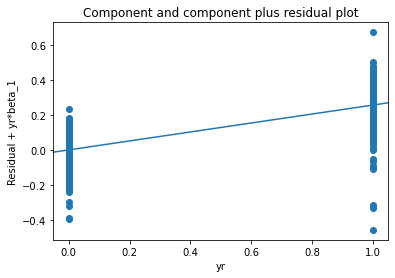

In [65]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model27, 'yr')
plt.show()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


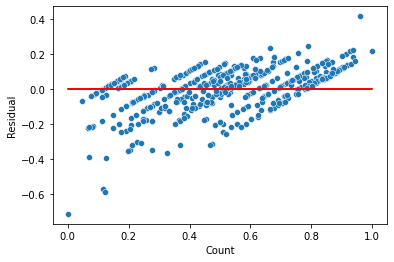

In [66]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model27.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Homoscedasticity qualifies as variance of residuals look relatively constant.

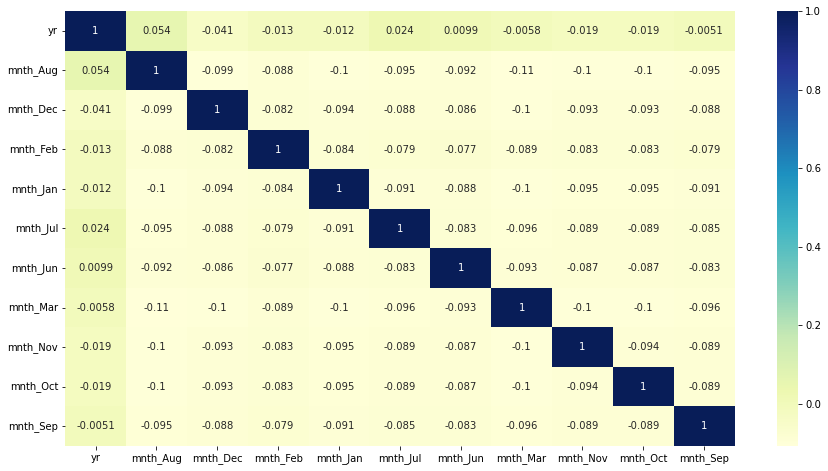

In [67]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


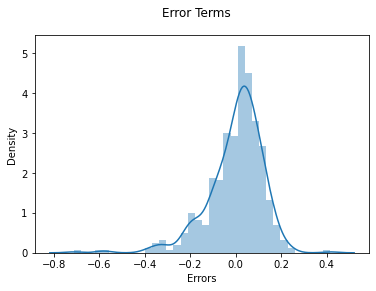

In [68]:
# Normality of Errors
y_train_pred = lr_model27.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


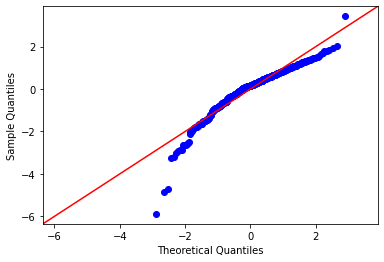

In [69]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

## Prediction using model 29

In [70]:
cols = df_test.columns
df_test[cols] = scaler.fit_transform(df_test[cols])

C:\Users\AnnieLiu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [71]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Adding the constant column
X_test_model27 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 29
X_test_model27 = X_test_model27.drop(['atemp','temp','hum','workingday','windspeed','mnth_Nov','holiday' ], axis=1)

C:\Users\AnnieLiu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [73]:
# Making prediction using Model 29
y_test_pred = lr_model27.predict(X_test_model27)
y_test_pred

184    0.498065
535    0.786164
299    0.456662
221    0.519321
152    0.530157
         ...   
702    0.551322
127    0.369743
640    0.712669
72     0.288071
653    0.712669
Length: 220, dtype: float64

In [74]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_test_pred})
df.head()

,Actual,Predicted
184,0.690412,0.498065
535,0.786788,0.786164
299,0.273355,0.456662
221,0.534755,0.519321
152,0.557925,0.530157


In [75]:
r2_score(y_test, y_test_pred)

0.6411985496040076

In [76]:
# Evluation of model
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.64
The Root Mean Squared Error of the model for the predicted values is 0.1393
The Mean Absolute Error of the model for the predicted values is 0.09765637001418433


Since the bookings increase on good weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.

An R-Squared value of 0.64 on the test data signifies that the model is a very good predictor and 64% of the variance is captured by the model.It can be further improved by using other regression techniques like Random Forest.

Understanding the results:

Rsq value is 91% which is good. It means that the degree of variance in Y variable is explained by X variables
Adj Rsq value is also good although it penalizes predictors more than Rsq
After looking at the p values we can see that ‘newspaper’ is not a significant X variable since p value is greater than 0.05
The coef values are good as they fall in 5% and 95%, except for the newspaper variable.

Summary
Our models passed all the validation tests. Thus, it is clear that by utilizing the 3 independent variables, our model can accurately forecast sales. However, our model only has an R2 value of 91%, implying that there are approximately 9% unknown factors influencing our pie sales.